In [156]:
import pandas as pd

In [157]:
trop_atmos = pd.read_csv('TAO_2006.csv')
trop_atmos.head()

,Timestamp,YYYYMMDD,HHMMSS,PREC,AIRT,SST,RH,Q
0,0,20060101,0,-0.17,28.75,29.690,79.8,HighQ
1,1,20060101,1000,0.00,28.86,29.708,79.2,HighQ
2,2,20060101,2000,-0.02,28.91,29.749,79.4,HighQ
3,3,20060101,3000,-0.01,28.85,29.757,78.4,HighQ
4,4,20060101,4000,-0.02,28.87,29.787,77.8,HighQ


# A1- Dataset Size

In [158]:
A1= trop_atmos.shape
print('The total number of rows and columns are ' + str(A1))

The total number of rows and columns are (35136, 8)


# A2- Max/Min values in each column

In [159]:
A2a = trop_atmos['PREC'].max()
print('The maximum value of Precipitation is ' + str(A2a))

The maximum value of Precipitation is 75.77


In [160]:
A2b = trop_atmos['PREC'].min()
print('The minimum value of Precipitation is ' + str(A2b))

The minimum value of Precipitation is -9.99


In [161]:
A2c = trop_atmos['AIRT'].max()
print('The maximum value of Air Temperature is ' + str(A2c))

The maximum value of Air Temperature is 31.57


In [162]:
A2d = trop_atmos['AIRT'].min()
print('The minimum value of Air Temperature is ' + str(A2d))

The minimum value of Air Temperature is -99.9


In [163]:
A2e = trop_atmos['SST'].max()
print('The maximum value of Sea Surface Temperature is ' + str(A2e))

The maximum value of Sea Surface Temperature is 31.346


In [164]:
A2f = trop_atmos['SST'].min()
print('The minimum value of Sea Surface Temperature is ' + str(A2f))

The minimum value of Sea Surface Temperature is -99.9


In [165]:
A2g = trop_atmos['RH'].max()
print('The maximum value of Relative Humidity is ' + str(A2g))

The maximum value of Relative Humidity is 98.1


In [166]:
A2h = trop_atmos['RH'].min()
print('The minimum value of Relative Humidity is ' + str(A2h))

The minimum value of Relative Humidity is -99.9


# A3- Number of records in each month

In [167]:
trop_atmos['YYYYMMDD'] = pd.to_datetime(trop_atmos['YYYYMMDD'].astype(str), format = '%Y%m%d')
trop_atmos.head()

,Timestamp,YYYYMMDD,HHMMSS,PREC,AIRT,SST,RH,Q
0,0,2006-01-01,0,-0.17,28.75,29.690,79.8,HighQ
1,1,2006-01-01,1000,0.00,28.86,29.708,79.2,HighQ
2,2,2006-01-01,2000,-0.02,28.91,29.749,79.4,HighQ
3,3,2006-01-01,3000,-0.01,28.85,29.757,78.4,HighQ
4,4,2006-01-01,4000,-0.02,28.87,29.787,77.8,HighQ


In [168]:
trop_atmos['Month']=trop_atmos['YYYYMMDD'].dt.month
trop_atmos.head()

,Timestamp,YYYYMMDD,HHMMSS,PREC,AIRT,SST,RH,Q,Month
0,0,2006-01-01,0,-0.17,28.75,29.690,79.8,HighQ,1
1,1,2006-01-01,1000,0.00,28.86,29.708,79.2,HighQ,1
2,2,2006-01-01,2000,-0.02,28.91,29.749,79.4,HighQ,1
3,3,2006-01-01,3000,-0.01,28.85,29.757,78.4,HighQ,1
4,4,2006-01-01,4000,-0.02,28.87,29.787,77.8,HighQ,1


In [169]:
trop_atmos['Month'].value_counts()

8    4464
7    4464
5    4464
3    4464
1    4464
6    4320
4    4320
2    4032
9     144
Name: Month, dtype: int64

# A4-Missing Values

In [170]:
column= ['PREC','SST', 'AIRT', 'RH']
cond1= trop_atmos['PREC']== -9.99
cond2= trop_atmos['SST']== -99.9
cond3= trop_atmos['AIRT']==-99.9
cond4= trop_atmos['RH']== -99.9
cond= cond1|cond2|cond3|cond4
trop_atmos[cond].count()

Timestamp    401
YYYYMMDD     401
HHMMSS       401
PREC         401
AIRT         401
SST          401
RH           401
Q            401
Month        401
dtype: int64

In [171]:
Set = trop_atmos[~cond]
Set['Month'].value_counts()

5    4464
1    4461
3    4458
8    4323
4    4317
6    4315
7    4221
2    4032
9     144
Name: Month, dtype: int64

In [172]:
Set = trop_atmos[cond]
Set['Month'].value_counts()

7    243
8    141
3      6
6      5
4      3
1      3
Name: Month, dtype: int64

In [173]:
D= set(trop_atmos.index).intersection(Set.index)
trop_atmos= trop_atmos.drop(D, axis=0)
trop_atmos.shape

(34735, 9)

In [174]:
trop_atmos.head()

,Timestamp,YYYYMMDD,HHMMSS,PREC,AIRT,SST,RH,Q,Month
0,0,2006-01-01,0,-0.17,28.75,29.690,79.8,HighQ,1
1,1,2006-01-01,1000,0.00,28.86,29.708,79.2,HighQ,1
2,2,2006-01-01,2000,-0.02,28.91,29.749,79.4,HighQ,1
3,3,2006-01-01,3000,-0.01,28.85,29.757,78.4,HighQ,1
4,4,2006-01-01,4000,-0.02,28.87,29.787,77.8,HighQ,1


# A5. Investigating Sea surface temperature (SST) in different months

In [175]:
import matplotlib.pyplot as plt

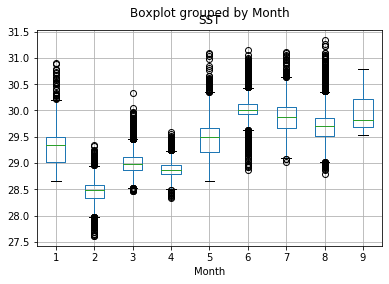

In [176]:
%matplotlib inline
trop_atmos.boxplot(column = 'SST', by = 'Month')


# A6. Exploring precipitation measurements (PREC)


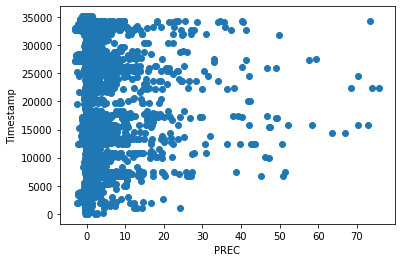

In [177]:
plt.scatter(trop_atmos['PREC'], trop_atmos['Timestamp'])
plt.xlabel('PREC')
plt.ylabel('Timestamp')
plt.show()

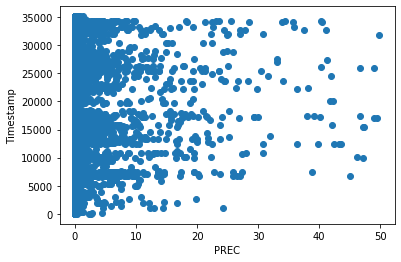

In [178]:
trop_atmos.loc[trop_atmos['PREC'] > 50, 'PREC'] = 0
trop_atmos.loc[trop_atmos['PREC'] < 0, 'PREC'] = 0
plt.scatter(trop_atmos['PREC'], trop_atmos['Timestamp'])
plt.xlabel('PREC')
plt.ylabel('Timestamp')
plt.show()

# A7. Relationship between variables

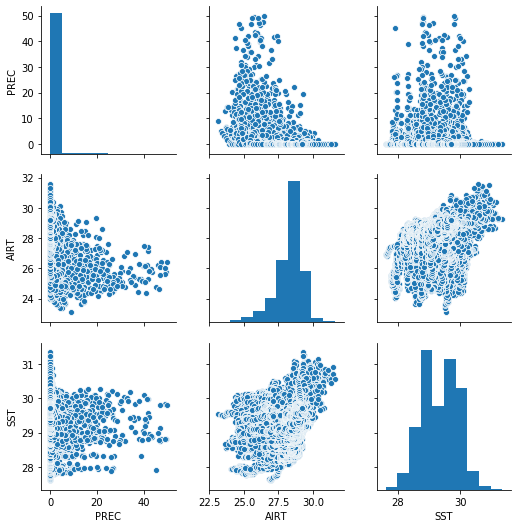

In [179]:
import seaborn as sb
sb.pairplot(trop_atmos[['PREC', 'AIRT', 'SST']])

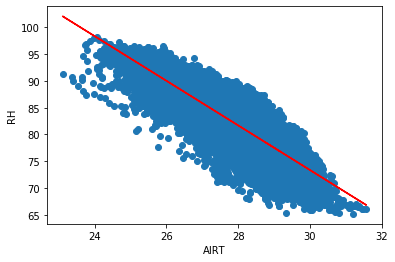

In [180]:
import matplotlib.lines as mlines

model = LinearRegression()

x=trop_atmos['AIRT']
y=trop_atmos['RH']

x = x[:, np.newaxis]
y = y[:, np.newaxis]
model.fit(x, y)
plt.scatter(x, y)

y_pred = model.predict(x)
plt.plot(x, y_pred, color='r')
plt.xlabel('AIRT')
plt.ylabel('RH')
plt.show()

In [181]:
trop_atmos.loc[trop_atmos['Q'] == 'HighQ', 'Q'] = 1
trop_atmos.loc[trop_atmos['Q'] == 'LowQ', 'Q'] = 0

In [182]:
#split dataset in features and target variable
features = ['PREC', 'AIRT', 'SST', 'RH']
X = trop_atmos[features] # Features
y = trop_atmos.Q # Target variable

In [183]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1) # 70% training and 30% test

In [184]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [185]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [186]:
from sklearn import metrics

prediction = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, prediction))

Accuracy: 0.9978120681713496


In [187]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test,prediction))
print("Accuracy:",(1+8663)/(1+8+12+8663))

[[   1    8]
 [  11 8664]]
Accuracy: 0.9976969138645785


# A9. Investigating daily relative humidity (RH)


In [209]:
trop_atmos['Day']=trop_atmos['YYYYMMDD'].dt.day
trop_atmos


,Timestamp,YYYYMMDD,HHMMSS,PREC,AIRT,SST,RH,Q,Month,Day
0,0,2006-01-01,0,0.00,28.75,29.690,79.8,1,1,1
1,1,2006-01-01,1000,0.00,28.86,29.708,79.2,1,1,1
2,2,2006-01-01,2000,0.00,28.91,29.749,79.4,1,1,1
3,3,2006-01-01,3000,0.00,28.85,29.757,78.4,1,1,1
4,4,2006-01-01,4000,0.00,28.87,29.787,77.8,1,1,1
5,5,2006-01-01,5000,0.00,28.71,29.793,78.2,1,1,1
6,6,2006-01-01,10000,0.00,28.66,29.803,77.5,1,1,1
7,7,2006-01-01,11000,0.01,28.64,29.815,77.5,1,1,1
8,8,2006-01-01,12000,0.00,28.64,29.788,78.3,1,1,1
9,9,2006-01-01,13000,0.00,28.63,29.760,79.6,1,1,1


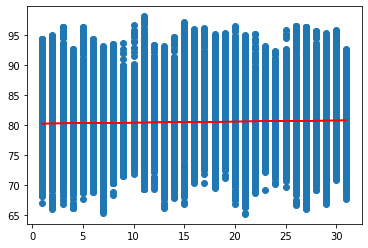

In [210]:
from sklearn.linear_model import LinearRegression
import numpy as np

x=trop_atmos['Day']
y=trop_atmos['RH']

x = x[:, np.newaxis]
y = y[:, np.newaxis]

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)


plt.scatter(x, y)
plt.plot(x, y_pred, color='r')
plt.show()